In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import random

In [5]:
data_root = "../original_dataset/zhang"

data_root = pathlib.Path(data_root)

In [6]:
data_root

WindowsPath('../original_dataset/zhang')

In [7]:
for item in data_root.iterdir():
    print(item)

..\original_dataset\zhang\covid
..\original_dataset\zhang\normal


In [8]:
all_image_paths = list(data_root.glob("*/*"))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

In [9]:

image_count = len(all_image_paths)

print(image_count)

440


In [10]:
label_names = [item.name for item in data_root.glob("*/") if item.is_dir()]

print(label_names)

['covid', 'normal']


In [11]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))

print(label_to_index)

{'covid': 0, 'normal': 1}


In [12]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]

In [13]:
def load_image(path):
    img_raw = tf.io.read_file(path)
    img_tensor = tf.image.decode_png(img_raw)
    img_final = tf.image.resize(img_tensor, [32, 32])
    img_final = img_final/255.0
    return img_final

In [14]:
all_images = tf.stack([load_image(path) for path in all_image_paths])

In [15]:
print(all_images.shape)

(440, 32, 32, 1)


In [16]:

all_image_labels = tf.stack(all_image_labels)

In [17]:
print(all_image_labels.shape)

(440,)


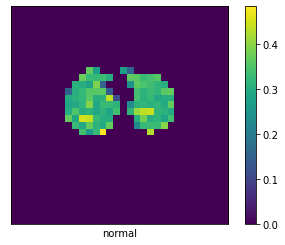

In [18]:
plt.figure()
plt.imshow(all_images[0])
plt.xticks([])
plt.yticks([])
plt.xlabel(label_names[all_image_labels[0]])
plt.colorbar()
plt.show()

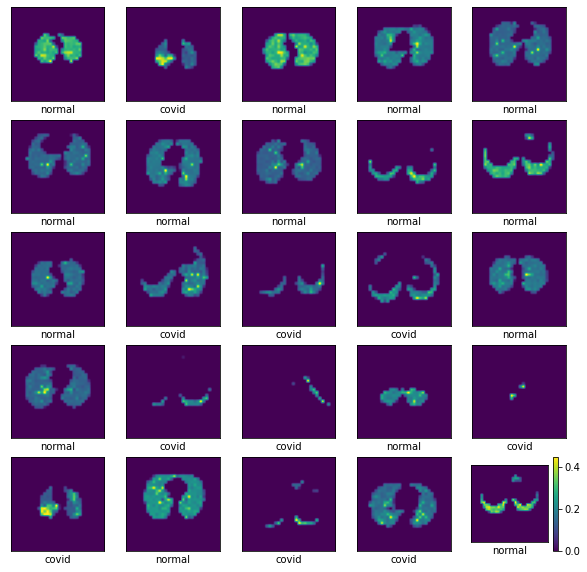

In [19]:
plt.figure(figsize=(10, 10))

for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.imshow(all_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_names[all_image_labels[i]])
plt.colorbar()
plt.show()

In [20]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 1)))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [21]:
train_images = all_images[:200]
test_images = all_images[200:]

train_labels = all_image_labels[:200]
test_labels = all_image_labels[200:]

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(200, 32, 32, 1)
(200,)
(240, 32, 32, 1)
(240,)


In [22]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs = 10)

Train on 200 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/sample - loss: 0.6834 - accuracy: 0.5500
Epoch 2/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.6118 - accuracy: 0.6450
Epoch 3/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.4804 - accuracy: 0.7350
Epoch 4/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.3376 - accuracy: 0.8550
Epoch 5/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.3257 - accuracy: 0.8450
Epoch 6/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.2551 - accuracy: 0.8700
Epoch 7/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.2134 - accuracy: 0.9100
Epoch 8/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.1237 - accuracy: 0.9550
Epoch 9/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.0950 - accuracy: 0.9600
Epoch 10/10
200/200 [==============================] - 0s 2ms

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

240/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[[0.9999583]]


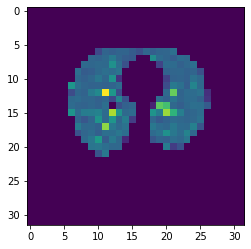

Actual value:  normal
Predicted value:  covid


In [25]:
img = test_images[0]

predictions_single = model.predict(np.expand_dims(img, axis = 0))

print(predictions_single)

plt.figure()
plt.imshow(img)
plt.show()

print("Actual value: ", label_names[test_labels[0]])
print("Predicted value: ", label_names[np.argmax(predictions_single)])

In [26]:
predict = tf.argmax(predictions_single)

In [27]:
predict

<tf.Tensor: id=6969, shape=(1,), dtype=int64, numpy=array([0], dtype=int64)>